# <center>PUBG Game Prediction</center>

<center><img src='https://media.giphy.com/media/XVbrX433vn6rqkexSj/giphy.gif'></center>

### Table Content

1. [Importing Libraries](#1)
2. [Reading Data](#2)
3. [Data Wrangling](#3)
4. [Analysing Data](#4)
5. [Feature Engineering](#5)
6. [Catboost Model](#6)

# Importing libraries<a class='anchor' id='1'></a>

In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(16,6)

import seaborn as sns

#handling warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ML model
import catboost as cb
from sklearn.metrics import r2_score

# Reading Data<a class='anchor' id='2'></a>

In [2]:
df=pd.read_csv('PUBG_Game_Prediction_data.csv')

In [3]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [4]:
df.shape

(4446966, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


### Data Descritption
**DBNOs** - Number of enemy players knocked.  
**assists** - Number of enemy players this player damaged that were killed by teammates.  
**boosts** - Number of boost items used.  
**damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.  
**headshotKills** - Number of enemy players killed with headshots.  
**heals** - Number of healing items used.  
**Id** - Player’s Id  
**killPlace** - Ranking in match of number of enemy players killed.  
**killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.  
**killStreaks** - Max number of enemy players killed in a short amount of time.  
**kills** - Number of enemy players killed.  
**longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.  
**matchDuration** - Duration of match in seconds.  
**matchId** - ID to identify match. There are no matches that are in both the training and testing set.  
**matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.  
**rankPoints** - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.  
**revives** - Number of times this player revived teammates.  
**rideDistance** - Total distance traveled in vehicles measured in meters.  
**roadKills** - Number of kills while in a vehicle.   
**swimDistance** - Total distance traveled by swimming measured in meters.  
**teamKills** - Number of times this player killed a teammate.  
**vehicleDestroys** - Number of vehicles destroyed.  
**walkDistance** - Total distance traveled on foot measured in meters.-  
**weaponsAcquired** - Number of weapons picked up.  
**winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.  
**groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.  
**numGroups** - Number of groups we have data for in the match.  
**maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.  
**winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# Data Wrangling<a class='anchor' id='3'></a>

Checking for rows with missing win prediction value.

In [7]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [8]:
df.dropna(inplace = True)

Understanding Players distributuion in the game.

In [9]:
# matchId will be same for all the players in a common game
df['playersJoined']=df.groupby('matchId')['matchId'].transform('count')

In [10]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


# Analysing Data<a class='anchor' id='4'></a>

**Kills without moving?**  
This means that we are trying to detect those people who without moving a single kilometer are killing people this basically means that those people are using some cheat code so will simply remove those people from our dataset.

In [11]:
# prepare a data parameter to gather the information of the total distance travelled
df['totalDistance']=df['rideDistance']+df['walkDistance']+df['swimDistance']

#prepare a data parameter to check for anomaly that the person have not moved but yet managed to do the kills
df['killswithoutMoving']=(df['kills']>0) & (df['totalDistance']==0)

In [12]:
df.drop(df[df['killswithoutMoving']==True].index,inplace=True)

**Extra Ordinary RoadKills??**  


In [13]:
df[df['roadKills']>5].shape

(46, 32)

In [14]:
df.drop(df[df['roadKills']>5].index,inplace=True)

**So many kills - how??**

<Axes: xlabel='kills', ylabel='count'>

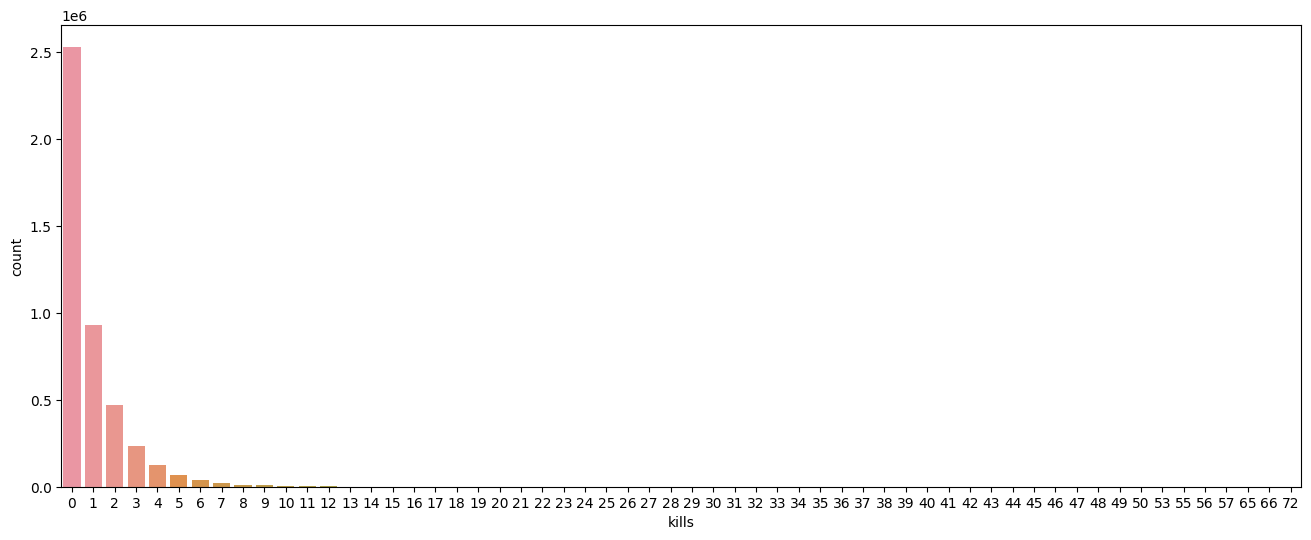

In [15]:
sns.countplot(data=df,x=df['kills'])

In [16]:
df1=df[df['kills']>=15]

<Axes: xlabel='kills', ylabel='count'>

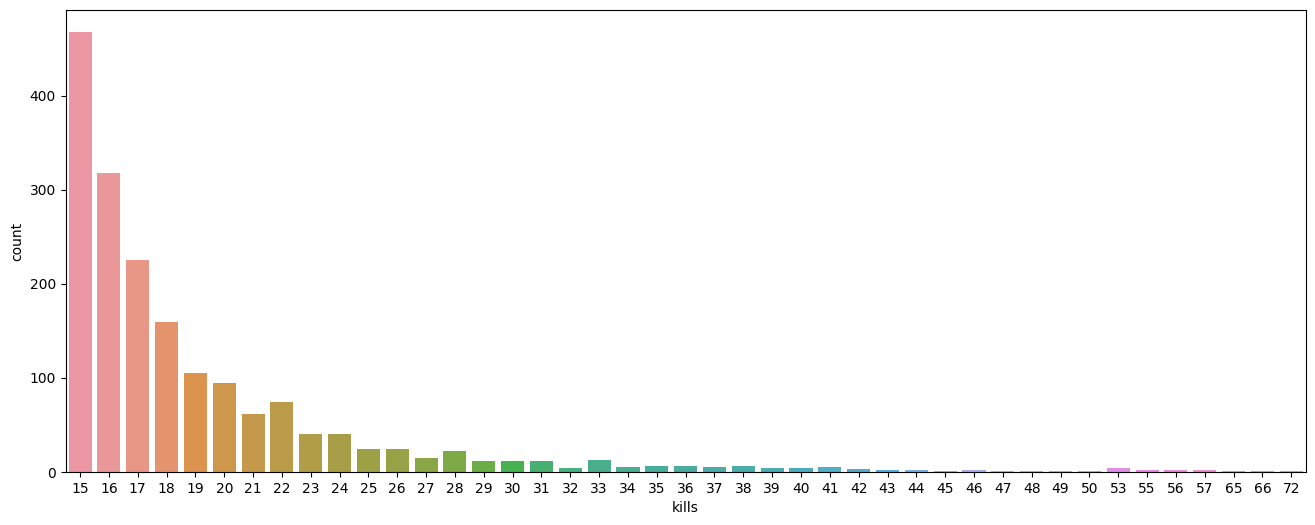

In [17]:
sns.countplot(data=df1,x=df1['kills'])

In [18]:
df.drop(df[df['kills']>20].index,inplace=True)

**Head shot??**  
If a person have too many kills and max of them are headshot then this is not possible because headshot requires a very high precision.

In [19]:
df['headshot_rate']=df['headshotKills']/df['kills']
df['headshot_rate']=df['headshot_rate'].fillna(0)

<Axes: xlabel='headshot_rate', ylabel='Density'>

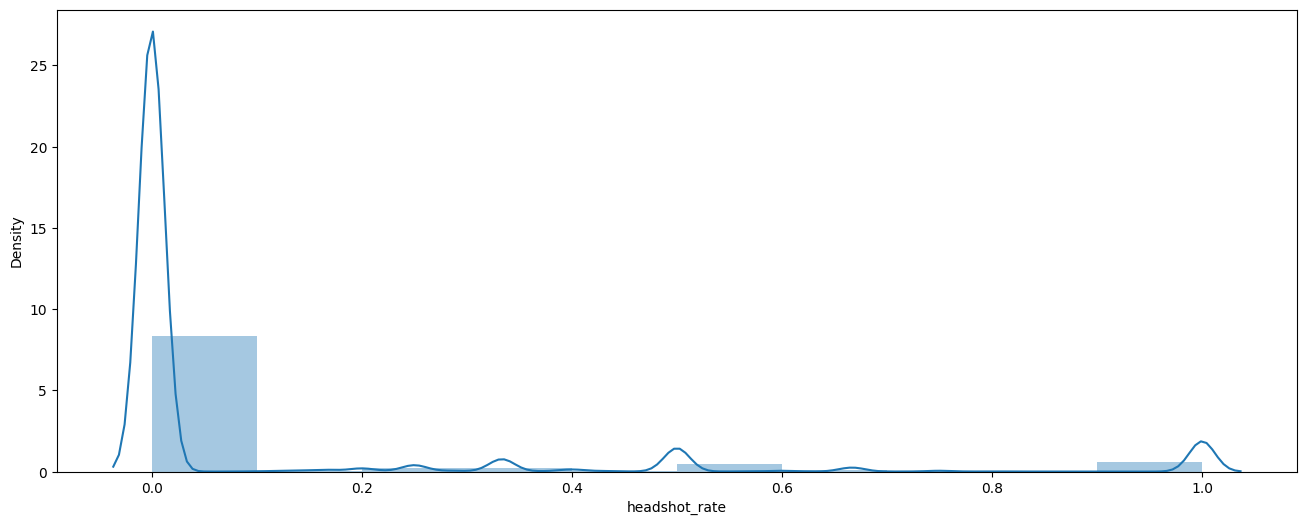

In [20]:
sns.distplot(df['headshot_rate'],bins=10)

In [21]:
df.drop(df[(df['headshot_rate']==1) & (df['kills']>5)].index,inplace=True)

**Longest Shot??**

<Axes: xlabel='longestKill', ylabel='Density'>

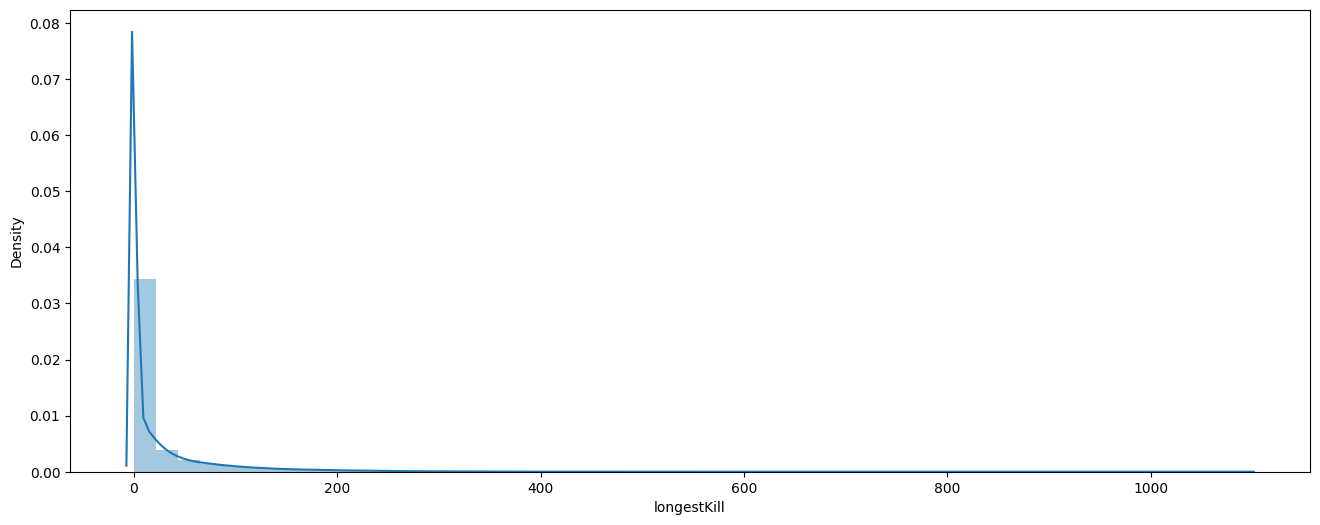

In [22]:
sns.distplot(df['longestKill'])

In [23]:
df.drop(df[df['longestKill']>500].index,inplace=True)

**Weapon change??**

<Axes: xlabel='weaponsAcquired', ylabel='Density'>

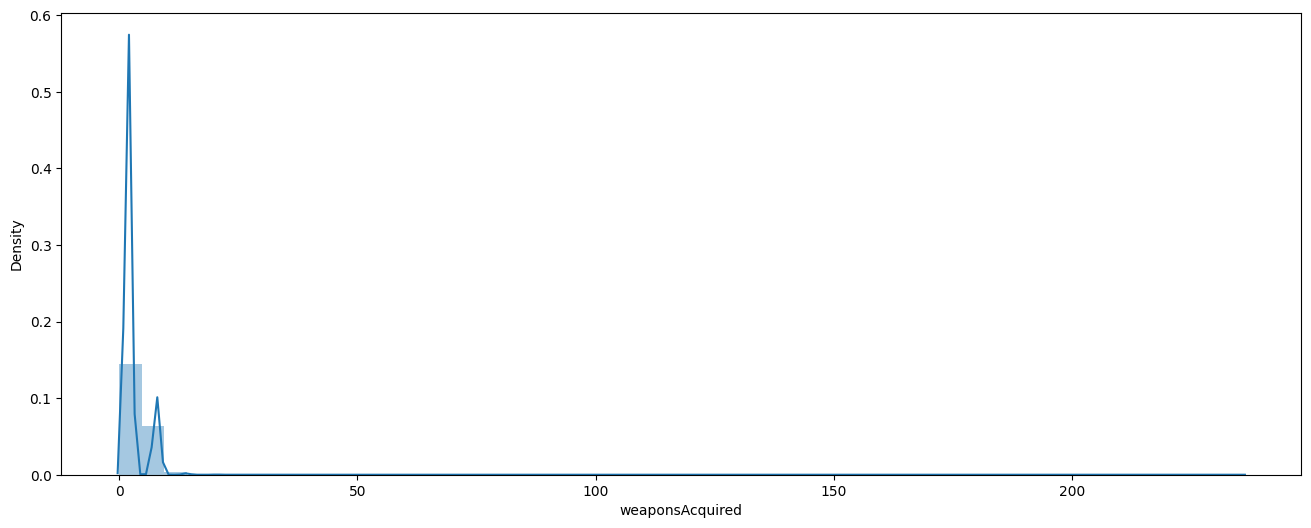

In [24]:
sns.distplot(df['weaponsAcquired'])

In [25]:
df.drop(df[df['weaponsAcquired']>15].index,inplace=True)

In [26]:
df.shape

(4437609, 33)

<Axes: >

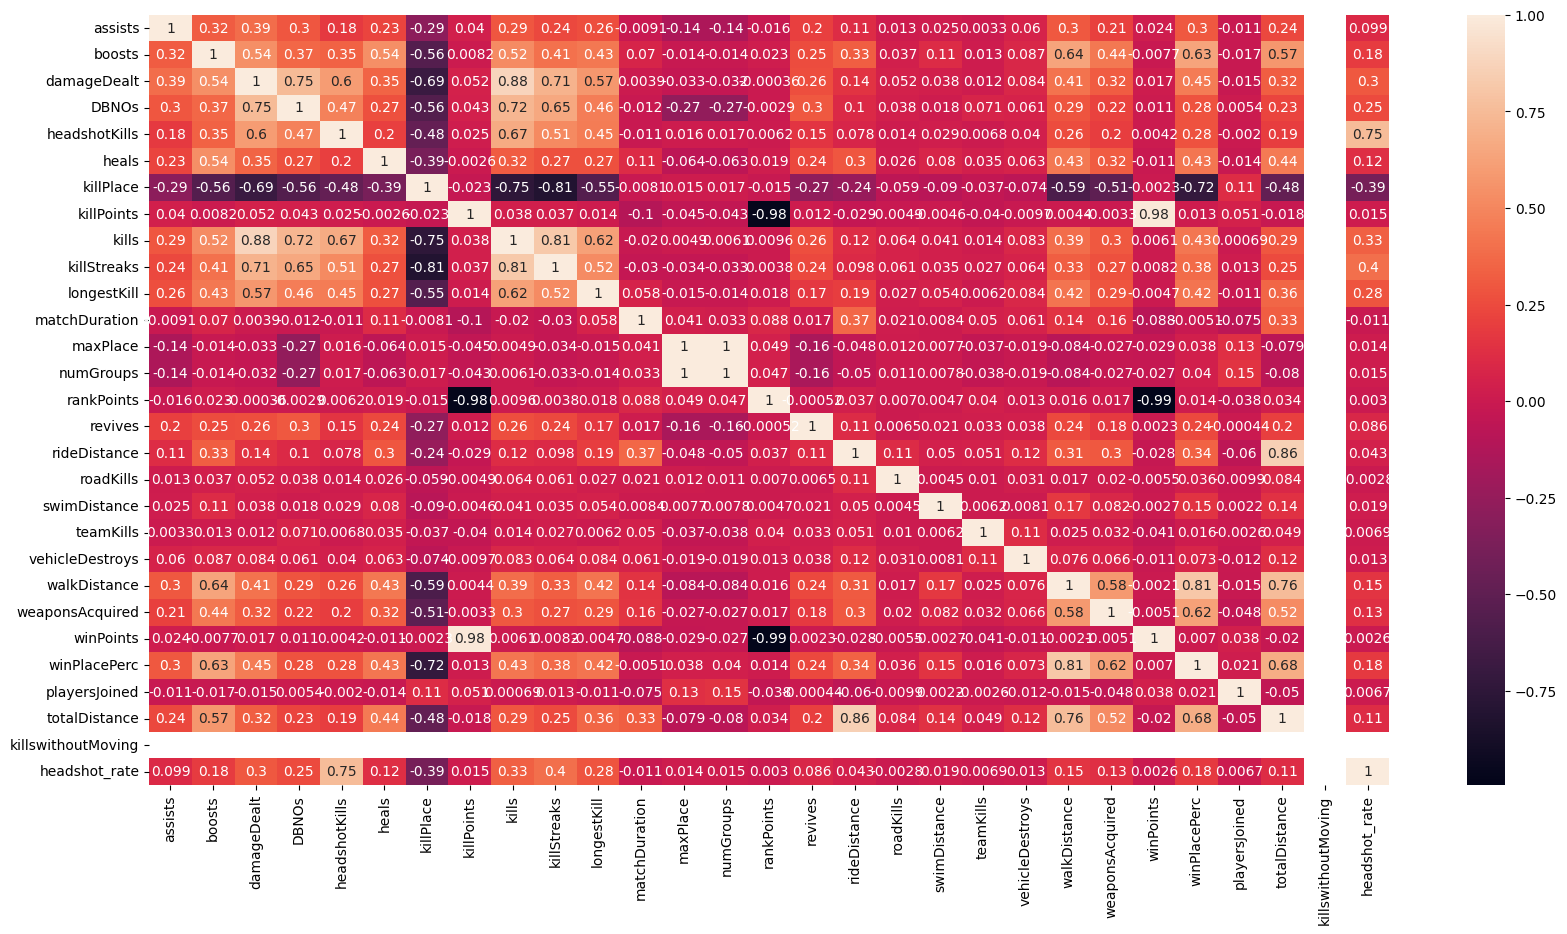

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

# Feature Engineering<a class='anchor' id='5'></a>

In [28]:
normalising_factor=(100-df['playersJoined'])/100+1

In [29]:
df['killsNorm']=df['kills']*normalising_factor
df['damageDealtNorm']=df['damageDealt']*normalising_factor
df['maxPlaceNorm']=df['maxPlace']*normalising_factor
df['matchDurationNorm']=df['matchDuration']*normalising_factor

In [30]:
df['traveldistance']=df['walkDistance']+df['swimDistance']+df['rideDistance']
df['healsnboosts']=df['heals']+df['boosts']
df['assist']=df['assists']+df['revives']

In [31]:
features=df.columns

In [32]:
df.drop(columns=['Id','groupId','matchId','assists', 'boosts','heals','kills','revives', 'rideDistance','swimDistance','walkDistance','damageDealt','matchDuration','maxPlace'],inplace=True)

# ML - Catboost Model<a class='anchor' id='6'></a>

### Handling Categorical Data

In [33]:
x=df.drop(['winPlacePerc'],axis=1)
y=df['winPlacePerc']

In [34]:
x=pd.get_dummies(x,columns=['matchType','killswithoutMoving'])


In [35]:
df['matchType'].value_counts()

squad-fpp           1755098
duo-fpp              996205
squad                625502
solo-fpp             536344
duo                  313280
solo                 181570
normal-squad-fpp      13286
crashfpp               6274
normal-duo-fpp         5016
flaretpp               2498
normal-solo-fpp         857
flarefpp                718
crashtpp                367
normal-squad            315
normal-duo              144
normal-solo             135
Name: matchType, dtype: int64

In [36]:
features=list(x.columns)

### Scaling the Data

In [37]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x))

In [38]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582723,-0.384145,0.449543,1.172543,-0.765177,-0.459685,-0.732763,-1.212394,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,-0.370782,-0.405072,1.236289,0.0
1,-0.582723,-0.384145,0.340251,-0.804724,-0.765177,-0.459685,-0.775734,0.803563,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,-0.370782,-0.405072,1.236289,0.0
2,-0.582723,-0.384145,-0.024055,-0.804724,-0.765177,-0.459685,0.169631,0.813066,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,-0.370782,-0.405072,-0.808872,0.0
3,-0.582723,-0.384145,0.996002,-0.804724,-0.765177,-0.459685,-0.560878,0.700389,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,-0.370782,-0.405072,1.236289,0.0
4,-0.582723,-0.384145,-0.096916,-0.804724,0.647528,0.727175,2.232246,0.906736,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,2.697000,-0.405072,-0.808872,0.0


In [39]:
x.columns=features

### Splitting data

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### Catboost Model

In [41]:
import catboost as cb

In [42]:
train_dataset=cb.Pool(x_train,y_train)
train_dataset=cb.Pool(x_test,y_test)

In [43]:
model=cb.CatBoostRegressor(loss_function='RMSE')

In [44]:
# GRID Search
grid={'iterations' : [100,150],
     'learning_rate':[0.03,0.1],
     'depth': [2,4,5,8]}
model.grid_search(grid,train_dataset)

0:	learn: 0.5481470	test: 0.5484239	best: 0.5484239 (0)	total: 240ms	remaining: 23.7s
1:	learn: 0.5333040	test: 0.5335817	best: 0.5335817 (1)	total: 318ms	remaining: 15.6s
2:	learn: 0.5189395	test: 0.5192159	best: 0.5192159 (2)	total: 401ms	remaining: 13s
3:	learn: 0.5050799	test: 0.5053472	best: 0.5053472 (3)	total: 469ms	remaining: 11.3s
4:	learn: 0.4916413	test: 0.4919091	best: 0.4919091 (4)	total: 551ms	remaining: 10.5s
5:	learn: 0.4786330	test: 0.4788979	best: 0.4788979 (5)	total: 620ms	remaining: 9.71s
6:	learn: 0.4660639	test: 0.4663226	best: 0.4663226 (6)	total: 686ms	remaining: 9.11s
7:	learn: 0.4538570	test: 0.4541122	best: 0.4541122 (7)	total: 836ms	remaining: 9.61s
8:	learn: 0.4420462	test: 0.4422974	best: 0.4422974 (8)	total: 907ms	remaining: 9.17s
9:	learn: 0.4306423	test: 0.4308912	best: 0.4308912 (9)	total: 979ms	remaining: 8.81s
10:	learn: 0.4196015	test: 0.4198472	best: 0.4198472 (10)	total: 1.06s	remaining: 8.55s
11:	learn: 0.4089441	test: 0.4091830	best: 0.4091830 (

94:	learn: 0.1397052	test: 0.1397218	best: 0.1397218 (94)	total: 7.45s	remaining: 392ms
95:	learn: 0.1393179	test: 0.1393315	best: 0.1393315 (95)	total: 7.52s	remaining: 313ms
96:	learn: 0.1389396	test: 0.1389492	best: 0.1389492 (96)	total: 7.59s	remaining: 235ms
97:	learn: 0.1385308	test: 0.1385391	best: 0.1385391 (97)	total: 7.66s	remaining: 156ms
98:	learn: 0.1381866	test: 0.1381933	best: 0.1381933 (98)	total: 7.71s	remaining: 77.9ms
99:	learn: 0.1378037	test: 0.1378110	best: 0.1378110 (99)	total: 7.77s	remaining: 0us

bestTest = 0.1378110336
bestIteration = 99

0:	loss: 0.1378110	best: 0.1378110 (0)	total: 8.88s	remaining: 2m 13s
0:	learn: 0.5124975	test: 0.5127679	best: 0.5127679 (0)	total: 69.9ms	remaining: 6.92s
1:	learn: 0.4669749	test: 0.4672482	best: 0.4672482 (1)	total: 135ms	remaining: 6.6s
2:	learn: 0.4264902	test: 0.4267581	best: 0.4267581 (2)	total: 199ms	remaining: 6.44s
3:	learn: 0.3905127	test: 0.3907606	best: 0.3907606 (3)	total: 264ms	remaining: 6.33s
4:	learn: 0.35

88:	learn: 0.1179425	test: 0.1179606	best: 0.1179606 (88)	total: 5.32s	remaining: 657ms
89:	learn: 0.1176096	test: 0.1176326	best: 0.1176326 (89)	total: 5.38s	remaining: 598ms
90:	learn: 0.1172405	test: 0.1172635	best: 0.1172635 (90)	total: 5.43s	remaining: 537ms
91:	learn: 0.1171518	test: 0.1171736	best: 0.1171736 (91)	total: 5.48s	remaining: 477ms
92:	learn: 0.1169781	test: 0.1169955	best: 0.1169955 (92)	total: 5.55s	remaining: 417ms
93:	learn: 0.1168736	test: 0.1169031	best: 0.1169031 (93)	total: 5.61s	remaining: 358ms
94:	learn: 0.1167644	test: 0.1167955	best: 0.1167955 (94)	total: 5.66s	remaining: 298ms
95:	learn: 0.1166846	test: 0.1167211	best: 0.1167211 (95)	total: 5.71s	remaining: 238ms
96:	learn: 0.1165914	test: 0.1166271	best: 0.1166271 (96)	total: 5.77s	remaining: 178ms
97:	learn: 0.1165094	test: 0.1165438	best: 0.1165438 (97)	total: 5.82s	remaining: 119ms
98:	learn: 0.1164361	test: 0.1164691	best: 0.1164691 (98)	total: 5.89s	remaining: 59.5ms
99:	learn: 0.1163375	test: 0.11

81:	learn: 0.1465115	test: 0.1465516	best: 0.1465516 (81)	total: 4.6s	remaining: 3.82s
82:	learn: 0.1458304	test: 0.1458685	best: 0.1458685 (82)	total: 4.66s	remaining: 3.76s
83:	learn: 0.1452129	test: 0.1452468	best: 0.1452468 (83)	total: 4.71s	remaining: 3.7s
84:	learn: 0.1446222	test: 0.1446521	best: 0.1446521 (84)	total: 4.77s	remaining: 3.65s
85:	learn: 0.1440708	test: 0.1441003	best: 0.1441003 (85)	total: 4.82s	remaining: 3.59s
86:	learn: 0.1435366	test: 0.1435644	best: 0.1435644 (86)	total: 4.87s	remaining: 3.53s
87:	learn: 0.1429611	test: 0.1429881	best: 0.1429881 (87)	total: 4.93s	remaining: 3.47s
88:	learn: 0.1424632	test: 0.1424893	best: 0.1424893 (88)	total: 4.98s	remaining: 3.41s
89:	learn: 0.1419869	test: 0.1420116	best: 0.1420116 (89)	total: 5.03s	remaining: 3.35s
90:	learn: 0.1414701	test: 0.1414943	best: 0.1414943 (90)	total: 5.08s	remaining: 3.3s
91:	learn: 0.1410100	test: 0.1410305	best: 0.1410305 (91)	total: 5.13s	remaining: 3.23s
92:	learn: 0.1405725	test: 0.140591

26:	learn: 0.1412490	test: 0.1412593	best: 0.1412593 (26)	total: 1.39s	remaining: 6.34s
27:	learn: 0.1398874	test: 0.1398916	best: 0.1398916 (27)	total: 1.44s	remaining: 6.28s
28:	learn: 0.1386679	test: 0.1386608	best: 0.1386608 (28)	total: 1.49s	remaining: 6.23s
29:	learn: 0.1373956	test: 0.1373895	best: 0.1373895 (29)	total: 1.54s	remaining: 6.18s
30:	learn: 0.1363733	test: 0.1363598	best: 0.1363598 (30)	total: 1.59s	remaining: 6.12s
31:	learn: 0.1353957	test: 0.1353850	best: 0.1353850 (31)	total: 1.65s	remaining: 6.08s
32:	learn: 0.1345588	test: 0.1345387	best: 0.1345387 (32)	total: 1.7s	remaining: 6.02s
33:	learn: 0.1337903	test: 0.1337714	best: 0.1337714 (33)	total: 1.75s	remaining: 5.96s
34:	learn: 0.1331061	test: 0.1330836	best: 0.1330836 (34)	total: 1.8s	remaining: 5.91s
35:	learn: 0.1323906	test: 0.1323642	best: 0.1323642 (35)	total: 1.85s	remaining: 5.85s
36:	learn: 0.1318135	test: 0.1317863	best: 0.1317863 (36)	total: 1.9s	remaining: 5.81s
37:	learn: 0.1312564	test: 0.131220

120:	learn: 0.1134614	test: 0.1135183	best: 0.1135183 (120)	total: 6.11s	remaining: 1.46s
121:	learn: 0.1134102	test: 0.1134679	best: 0.1134679 (121)	total: 6.15s	remaining: 1.41s
122:	learn: 0.1133568	test: 0.1134181	best: 0.1134181 (122)	total: 6.2s	remaining: 1.36s
123:	learn: 0.1130989	test: 0.1131687	best: 0.1131687 (123)	total: 6.25s	remaining: 1.31s
124:	learn: 0.1127955	test: 0.1128705	best: 0.1128705 (124)	total: 6.3s	remaining: 1.26s
125:	learn: 0.1127304	test: 0.1128049	best: 0.1128049 (125)	total: 6.35s	remaining: 1.21s
126:	learn: 0.1126356	test: 0.1127106	best: 0.1127106 (126)	total: 6.4s	remaining: 1.16s
127:	learn: 0.1125567	test: 0.1126317	best: 0.1126317 (127)	total: 6.45s	remaining: 1.11s
128:	learn: 0.1124557	test: 0.1125313	best: 0.1125313 (128)	total: 6.49s	remaining: 1.06s
129:	learn: 0.1123813	test: 0.1124636	best: 0.1124636 (129)	total: 6.54s	remaining: 1.01s
130:	learn: 0.1121391	test: 0.1122202	best: 0.1122202 (130)	total: 6.59s	remaining: 956ms
131:	learn: 0

64:	learn: 0.1466268	test: 0.1466843	best: 0.1466843 (64)	total: 4.97s	remaining: 2.67s
65:	learn: 0.1452257	test: 0.1452788	best: 0.1452788 (65)	total: 5.04s	remaining: 2.6s
66:	learn: 0.1437567	test: 0.1438060	best: 0.1438060 (66)	total: 5.11s	remaining: 2.52s
67:	learn: 0.1424737	test: 0.1425207	best: 0.1425207 (67)	total: 5.18s	remaining: 2.44s
68:	learn: 0.1411926	test: 0.1412367	best: 0.1412367 (68)	total: 5.25s	remaining: 2.36s
69:	learn: 0.1399779	test: 0.1400199	best: 0.1400199 (69)	total: 5.32s	remaining: 2.28s
70:	learn: 0.1387409	test: 0.1387818	best: 0.1387818 (70)	total: 5.4s	remaining: 2.21s
71:	learn: 0.1376673	test: 0.1377075	best: 0.1377075 (71)	total: 5.47s	remaining: 2.13s
72:	learn: 0.1365922	test: 0.1366275	best: 0.1366275 (72)	total: 5.55s	remaining: 2.05s
73:	learn: 0.1355865	test: 0.1356192	best: 0.1356192 (73)	total: 5.62s	remaining: 1.97s
74:	learn: 0.1346082	test: 0.1346375	best: 0.1346375 (74)	total: 5.7s	remaining: 1.9s
75:	learn: 0.1336861	test: 0.1337129

59:	learn: 0.1042001	test: 0.1041906	best: 0.1041906 (59)	total: 4.19s	remaining: 2.79s
60:	learn: 0.1038208	test: 0.1038272	best: 0.1038272 (60)	total: 4.26s	remaining: 2.73s
61:	learn: 0.1036818	test: 0.1036901	best: 0.1036901 (61)	total: 4.33s	remaining: 2.65s
62:	learn: 0.1035412	test: 0.1035505	best: 0.1035505 (62)	total: 4.39s	remaining: 2.58s
63:	learn: 0.1032479	test: 0.1032597	best: 0.1032597 (63)	total: 4.46s	remaining: 2.51s
64:	learn: 0.1030694	test: 0.1030788	best: 0.1030788 (64)	total: 4.53s	remaining: 2.44s
65:	learn: 0.1026120	test: 0.1026173	best: 0.1026173 (65)	total: 4.6s	remaining: 2.37s
66:	learn: 0.1024546	test: 0.1024663	best: 0.1024663 (66)	total: 4.66s	remaining: 2.3s
67:	learn: 0.1021455	test: 0.1021555	best: 0.1021555 (67)	total: 4.74s	remaining: 2.23s
68:	learn: 0.1019263	test: 0.1019385	best: 0.1019385 (68)	total: 4.81s	remaining: 2.16s
69:	learn: 0.1016381	test: 0.1016583	best: 0.1016583 (69)	total: 4.88s	remaining: 2.09s
70:	learn: 0.1014790	test: 0.10149

54:	learn: 0.1649310	test: 0.1650143	best: 0.1650143 (54)	total: 4.14s	remaining: 7.14s
55:	learn: 0.1626816	test: 0.1627621	best: 0.1627621 (55)	total: 4.21s	remaining: 7.08s
56:	learn: 0.1605594	test: 0.1606357	best: 0.1606357 (56)	total: 4.29s	remaining: 7.01s
57:	learn: 0.1585433	test: 0.1586178	best: 0.1586178 (57)	total: 4.37s	remaining: 6.93s
58:	learn: 0.1566333	test: 0.1567035	best: 0.1567035 (58)	total: 4.44s	remaining: 6.85s
59:	learn: 0.1547970	test: 0.1548643	best: 0.1548643 (59)	total: 4.51s	remaining: 6.77s
60:	learn: 0.1530238	test: 0.1530889	best: 0.1530889 (60)	total: 4.58s	remaining: 6.68s
61:	learn: 0.1513568	test: 0.1514178	best: 0.1514178 (61)	total: 4.65s	remaining: 6.61s
62:	learn: 0.1496235	test: 0.1496854	best: 0.1496854 (62)	total: 4.73s	remaining: 6.53s
63:	learn: 0.1480951	test: 0.1481540	best: 0.1481540 (63)	total: 4.79s	remaining: 6.44s
64:	learn: 0.1466268	test: 0.1466843	best: 0.1466843 (64)	total: 4.87s	remaining: 6.36s
65:	learn: 0.1452257	test: 0.145

147:	learn: 0.1093242	test: 0.1092995	best: 0.1092995 (147)	total: 10.8s	remaining: 145ms
148:	learn: 0.1092070	test: 0.1091824	best: 0.1091824 (148)	total: 10.8s	remaining: 72.7ms
149:	learn: 0.1090281	test: 0.1090079	best: 0.1090079 (149)	total: 10.9s	remaining: 0us

bestTest = 0.1090078833
bestIteration = 149

6:	loss: 0.1090079	best: 0.0967494 (5)	total: 56.4s	remaining: 1m 12s
0:	learn: 0.5113604	test: 0.5116400	best: 0.5116400 (0)	total: 82.5ms	remaining: 12.3s
1:	learn: 0.4646065	test: 0.4648849	best: 0.4648849 (1)	total: 157ms	remaining: 11.6s
2:	learn: 0.4229717	test: 0.4232458	best: 0.4232458 (2)	total: 231ms	remaining: 11.3s
3:	learn: 0.3859139	test: 0.3861641	best: 0.3861641 (3)	total: 304ms	remaining: 11.1s
4:	learn: 0.3527471	test: 0.3529701	best: 0.3529701 (4)	total: 388ms	remaining: 11.2s
5:	learn: 0.3233605	test: 0.3235601	best: 0.3235601 (5)	total: 459ms	remaining: 11s
6:	learn: 0.2971525	test: 0.2973323	best: 0.2973323 (6)	total: 536ms	remaining: 10.9s
7:	learn: 0.27

91:	learn: 0.0976339	test: 0.0976815	best: 0.0976815 (91)	total: 6.5s	remaining: 4.1s
92:	learn: 0.0975216	test: 0.0975712	best: 0.0975712 (92)	total: 6.57s	remaining: 4.03s
93:	learn: 0.0974499	test: 0.0974995	best: 0.0974995 (93)	total: 6.65s	remaining: 3.96s
94:	learn: 0.0972292	test: 0.0972774	best: 0.0972774 (94)	total: 6.72s	remaining: 3.89s
95:	learn: 0.0970916	test: 0.0971386	best: 0.0971386 (95)	total: 6.79s	remaining: 3.82s
96:	learn: 0.0970254	test: 0.0970725	best: 0.0970725 (96)	total: 6.85s	remaining: 3.75s
97:	learn: 0.0968512	test: 0.0968956	best: 0.0968956 (97)	total: 6.93s	remaining: 3.67s
98:	learn: 0.0967606	test: 0.0968075	best: 0.0968075 (98)	total: 6.99s	remaining: 3.6s
99:	learn: 0.0966987	test: 0.0967494	best: 0.0967494 (99)	total: 7.06s	remaining: 3.53s
100:	learn: 0.0964921	test: 0.0965396	best: 0.0965396 (100)	total: 7.14s	remaining: 3.46s
101:	learn: 0.0962005	test: 0.0962545	best: 0.0962545 (101)	total: 7.21s	remaining: 3.39s
102:	learn: 0.0960038	test: 0.0

34:	learn: 0.2301115	test: 0.2302389	best: 0.2302389 (34)	total: 3.06s	remaining: 5.69s
35:	learn: 0.2252175	test: 0.2253383	best: 0.2253383 (35)	total: 3.15s	remaining: 5.61s
36:	learn: 0.2205640	test: 0.2206774	best: 0.2206774 (36)	total: 3.24s	remaining: 5.51s
37:	learn: 0.2160544	test: 0.2161614	best: 0.2161614 (37)	total: 3.33s	remaining: 5.43s
38:	learn: 0.2117447	test: 0.2118509	best: 0.2118509 (38)	total: 3.42s	remaining: 5.35s
39:	learn: 0.2075597	test: 0.2076648	best: 0.2076648 (39)	total: 3.52s	remaining: 5.27s
40:	learn: 0.2035805	test: 0.2036790	best: 0.2036790 (40)	total: 3.6s	remaining: 5.18s
41:	learn: 0.1996879	test: 0.1997852	best: 0.1997852 (41)	total: 3.69s	remaining: 5.1s
42:	learn: 0.1958631	test: 0.1959544	best: 0.1959544 (42)	total: 3.78s	remaining: 5.01s
43:	learn: 0.1922658	test: 0.1923577	best: 0.1923577 (43)	total: 3.87s	remaining: 4.93s
44:	learn: 0.1888397	test: 0.1889299	best: 0.1889299 (44)	total: 3.96s	remaining: 4.84s
45:	learn: 0.1855532	test: 0.18564

27:	learn: 0.1154856	test: 0.1154449	best: 0.1154449 (27)	total: 2.47s	remaining: 6.36s
28:	learn: 0.1140072	test: 0.1139800	best: 0.1139800 (28)	total: 2.55s	remaining: 6.24s
29:	learn: 0.1128369	test: 0.1127991	best: 0.1127991 (29)	total: 2.64s	remaining: 6.15s
30:	learn: 0.1118605	test: 0.1118202	best: 0.1118202 (30)	total: 2.73s	remaining: 6.07s
31:	learn: 0.1110379	test: 0.1110002	best: 0.1110002 (31)	total: 2.8s	remaining: 5.95s
32:	learn: 0.1102720	test: 0.1102371	best: 0.1102371 (32)	total: 2.89s	remaining: 5.86s
33:	learn: 0.1093783	test: 0.1093456	best: 0.1093456 (33)	total: 2.97s	remaining: 5.77s
34:	learn: 0.1084653	test: 0.1084188	best: 0.1084188 (34)	total: 3.06s	remaining: 5.68s
35:	learn: 0.1077645	test: 0.1077232	best: 0.1077232 (35)	total: 3.13s	remaining: 5.57s
36:	learn: 0.1070331	test: 0.1069954	best: 0.1069954 (36)	total: 3.22s	remaining: 5.49s
37:	learn: 0.1065093	test: 0.1064725	best: 0.1064725 (37)	total: 3.3s	remaining: 5.39s
38:	learn: 0.1059050	test: 0.10587

21:	learn: 0.3115284	test: 0.3117090	best: 0.3117090 (21)	total: 2.21s	remaining: 12.9s
22:	learn: 0.3038585	test: 0.3040342	best: 0.3040342 (22)	total: 2.31s	remaining: 12.8s
23:	learn: 0.2964311	test: 0.2966070	best: 0.2966070 (23)	total: 2.44s	remaining: 12.8s
24:	learn: 0.2892893	test: 0.2894567	best: 0.2894567 (24)	total: 2.54s	remaining: 12.7s
25:	learn: 0.2823612	test: 0.2825221	best: 0.2825221 (25)	total: 2.63s	remaining: 12.5s
26:	learn: 0.2757262	test: 0.2758850	best: 0.2758850 (26)	total: 2.74s	remaining: 12.5s
27:	learn: 0.2692683	test: 0.2694173	best: 0.2694173 (27)	total: 2.86s	remaining: 12.5s
28:	learn: 0.2629903	test: 0.2631397	best: 0.2631397 (28)	total: 2.98s	remaining: 12.4s
29:	learn: 0.2569972	test: 0.2571392	best: 0.2571392 (29)	total: 3.07s	remaining: 12.3s
30:	learn: 0.2512680	test: 0.2514078	best: 0.2514078 (30)	total: 3.16s	remaining: 12.1s
31:	learn: 0.2456430	test: 0.2457788	best: 0.2457788 (31)	total: 3.27s	remaining: 12.1s
32:	learn: 0.2402677	test: 0.240

115:	learn: 0.1090644	test: 0.1090443	best: 0.1090443 (115)	total: 10.5s	remaining: 3.09s
116:	learn: 0.1087260	test: 0.1087077	best: 0.1087077 (116)	total: 10.6s	remaining: 3s
117:	learn: 0.1085386	test: 0.1085210	best: 0.1085210 (117)	total: 10.7s	remaining: 2.91s
118:	learn: 0.1083637	test: 0.1083468	best: 0.1083468 (118)	total: 10.8s	remaining: 2.82s
119:	learn: 0.1081509	test: 0.1081341	best: 0.1081341 (119)	total: 10.9s	remaining: 2.73s
120:	learn: 0.1079909	test: 0.1079730	best: 0.1079730 (120)	total: 11s	remaining: 2.63s
121:	learn: 0.1077693	test: 0.1077524	best: 0.1077524 (121)	total: 11.1s	remaining: 2.54s
122:	learn: 0.1075679	test: 0.1075509	best: 0.1075509 (122)	total: 11.2s	remaining: 2.45s
123:	learn: 0.1073486	test: 0.1073343	best: 0.1073343 (123)	total: 11.2s	remaining: 2.36s
124:	learn: 0.1071586	test: 0.1071453	best: 0.1071453 (124)	total: 11.3s	remaining: 2.26s
125:	learn: 0.1070066	test: 0.1069933	best: 0.1069933 (125)	total: 11.4s	remaining: 2.17s
126:	learn: 0.1

57:	learn: 0.0985724	test: 0.0985454	best: 0.0985454 (57)	total: 5.01s	remaining: 7.95s
58:	learn: 0.0983398	test: 0.0983119	best: 0.0983119 (58)	total: 5.09s	remaining: 7.86s
59:	learn: 0.0981378	test: 0.0981123	best: 0.0981123 (59)	total: 5.17s	remaining: 7.75s
60:	learn: 0.0979451	test: 0.0979206	best: 0.0979206 (60)	total: 5.26s	remaining: 7.68s
61:	learn: 0.0978285	test: 0.0978051	best: 0.0978051 (61)	total: 5.34s	remaining: 7.58s
62:	learn: 0.0974317	test: 0.0974126	best: 0.0974126 (62)	total: 5.42s	remaining: 7.49s
63:	learn: 0.0972194	test: 0.0971949	best: 0.0971949 (63)	total: 5.51s	remaining: 7.41s
64:	learn: 0.0968241	test: 0.0968034	best: 0.0968034 (64)	total: 5.59s	remaining: 7.32s
65:	learn: 0.0966513	test: 0.0966405	best: 0.0966405 (65)	total: 5.67s	remaining: 7.21s
66:	learn: 0.0964825	test: 0.0964697	best: 0.0964697 (66)	total: 5.74s	remaining: 7.12s
67:	learn: 0.0963394	test: 0.0963266	best: 0.0963266 (67)	total: 5.81s	remaining: 7.01s
68:	learn: 0.0961733	test: 0.096

0:	learn: 0.5475237	test: 0.5478047	best: 0.5478047 (0)	total: 131ms	remaining: 12.9s
1:	learn: 0.5320585	test: 0.5323329	best: 0.5323329 (1)	total: 254ms	remaining: 12.4s
2:	learn: 0.5171208	test: 0.5173940	best: 0.5173940 (2)	total: 382ms	remaining: 12.3s
3:	learn: 0.5026751	test: 0.5029446	best: 0.5029446 (3)	total: 498ms	remaining: 12s
4:	learn: 0.4887694	test: 0.4890388	best: 0.4890388 (4)	total: 616ms	remaining: 11.7s
5:	learn: 0.4751545	test: 0.4754297	best: 0.4754297 (5)	total: 738ms	remaining: 11.6s
6:	learn: 0.4619194	test: 0.4621885	best: 0.4621885 (6)	total: 862ms	remaining: 11.4s
7:	learn: 0.4491446	test: 0.4494080	best: 0.4494080 (7)	total: 986ms	remaining: 11.3s
8:	learn: 0.4368343	test: 0.4370908	best: 0.4370908 (8)	total: 1.1s	remaining: 11.2s
9:	learn: 0.4248683	test: 0.4251193	best: 0.4251193 (9)	total: 1.23s	remaining: 11s
10:	learn: 0.4132391	test: 0.4134829	best: 0.4134829 (10)	total: 1.35s	remaining: 10.9s
11:	learn: 0.4019719	test: 0.4022121	best: 0.4022121 (11)

94:	learn: 0.1042502	test: 0.1042703	best: 0.1042703 (94)	total: 11.5s	remaining: 604ms
95:	learn: 0.1037974	test: 0.1038197	best: 0.1038197 (95)	total: 11.6s	remaining: 483ms
96:	learn: 0.1033688	test: 0.1033901	best: 0.1033901 (96)	total: 11.7s	remaining: 362ms
97:	learn: 0.1029631	test: 0.1029870	best: 0.1029870 (97)	total: 11.8s	remaining: 241ms
98:	learn: 0.1025890	test: 0.1026121	best: 0.1026121 (98)	total: 11.9s	remaining: 121ms
99:	learn: 0.1021744	test: 0.1021969	best: 0.1021969 (99)	total: 12.1s	remaining: 0us

bestTest = 0.1021968568
bestIteration = 99

12:	loss: 0.1021969	best: 0.0869719 (11)	total: 2m 2s	remaining: 28.2s
0:	learn: 0.5103509	test: 0.5106341	best: 0.5106341 (0)	total: 131ms	remaining: 13s
1:	learn: 0.4626128	test: 0.4628752	best: 0.4628752 (1)	total: 252ms	remaining: 12.3s
2:	learn: 0.4202092	test: 0.4204409	best: 0.4204409 (2)	total: 385ms	remaining: 12.4s
3:	learn: 0.3823493	test: 0.3825523	best: 0.3825523 (3)	total: 520ms	remaining: 12.5s
4:	learn: 0.3485

87:	learn: 0.0851552	test: 0.0853103	best: 0.0853103 (87)	total: 10.6s	remaining: 1.45s
88:	learn: 0.0851038	test: 0.0852626	best: 0.0852626 (88)	total: 10.7s	remaining: 1.33s
89:	learn: 0.0850608	test: 0.0852201	best: 0.0852201 (89)	total: 10.8s	remaining: 1.2s
90:	learn: 0.0849769	test: 0.0851393	best: 0.0851393 (90)	total: 10.9s	remaining: 1.08s
91:	learn: 0.0848604	test: 0.0850201	best: 0.0850201 (91)	total: 11s	remaining: 960ms
92:	learn: 0.0848029	test: 0.0849646	best: 0.0849646 (92)	total: 11.1s	remaining: 838ms
93:	learn: 0.0846854	test: 0.0848500	best: 0.0848500 (93)	total: 11.3s	remaining: 718ms
94:	learn: 0.0846326	test: 0.0847977	best: 0.0847977 (94)	total: 11.4s	remaining: 598ms
95:	learn: 0.0845841	test: 0.0847521	best: 0.0847521 (95)	total: 11.5s	remaining: 478ms
96:	learn: 0.0845338	test: 0.0847016	best: 0.0847016 (96)	total: 11.6s	remaining: 358ms
97:	learn: 0.0844460	test: 0.0846153	best: 0.0846153 (97)	total: 11.7s	remaining: 239ms
98:	learn: 0.0844023	test: 0.084575

80:	learn: 0.1127499	test: 0.1127826	best: 0.1127826 (80)	total: 9.83s	remaining: 8.37s
81:	learn: 0.1120009	test: 0.1120336	best: 0.1120336 (81)	total: 9.95s	remaining: 8.25s
82:	learn: 0.1112807	test: 0.1113125	best: 0.1113125 (82)	total: 10.1s	remaining: 8.12s
83:	learn: 0.1105977	test: 0.1106275	best: 0.1106275 (83)	total: 10.2s	remaining: 7.99s
84:	learn: 0.1099442	test: 0.1099726	best: 0.1099726 (84)	total: 10.3s	remaining: 7.86s
85:	learn: 0.1091820	test: 0.1092124	best: 0.1092124 (85)	total: 10.4s	remaining: 7.74s
86:	learn: 0.1086002	test: 0.1086310	best: 0.1086310 (86)	total: 10.5s	remaining: 7.61s
87:	learn: 0.1079527	test: 0.1079805	best: 0.1079805 (87)	total: 10.6s	remaining: 7.49s
88:	learn: 0.1073483	test: 0.1073744	best: 0.1073744 (88)	total: 10.7s	remaining: 7.36s
89:	learn: 0.1067947	test: 0.1068219	best: 0.1068219 (89)	total: 10.9s	remaining: 7.24s
90:	learn: 0.1062699	test: 0.1062960	best: 0.1062960 (90)	total: 11s	remaining: 7.11s
91:	learn: 0.1057413	test: 0.10576

22:	learn: 0.1144004	test: 0.1144510	best: 0.1144510 (22)	total: 2.82s	remaining: 15.6s
23:	learn: 0.1116814	test: 0.1117280	best: 0.1117280 (23)	total: 2.94s	remaining: 15.4s
24:	learn: 0.1094130	test: 0.1094722	best: 0.1094722 (24)	total: 3.05s	remaining: 15.2s
25:	learn: 0.1070028	test: 0.1070550	best: 0.1070550 (25)	total: 3.17s	remaining: 15.1s
26:	learn: 0.1052782	test: 0.1053253	best: 0.1053253 (26)	total: 3.28s	remaining: 14.9s
27:	learn: 0.1035689	test: 0.1036133	best: 0.1036133 (27)	total: 3.39s	remaining: 14.8s
28:	learn: 0.1023489	test: 0.1023895	best: 0.1023895 (28)	total: 3.5s	remaining: 14.6s
29:	learn: 0.1012147	test: 0.1012570	best: 0.1012570 (29)	total: 3.61s	remaining: 14.4s
30:	learn: 0.1000934	test: 0.1001389	best: 0.1001389 (30)	total: 3.72s	remaining: 14.3s
31:	learn: 0.0991911	test: 0.0992432	best: 0.0992432 (31)	total: 3.83s	remaining: 14.1s
32:	learn: 0.0983688	test: 0.0984323	best: 0.0984323 (32)	total: 3.95s	remaining: 14s
33:	learn: 0.0975287	test: 0.097595

117:	learn: 0.0834449	test: 0.0836628	best: 0.0836628 (117)	total: 13.6s	remaining: 3.69s
118:	learn: 0.0833887	test: 0.0836082	best: 0.0836082 (118)	total: 13.7s	remaining: 3.58s
119:	learn: 0.0833312	test: 0.0835502	best: 0.0835502 (119)	total: 13.8s	remaining: 3.46s
120:	learn: 0.0833021	test: 0.0835228	best: 0.0835228 (120)	total: 14s	remaining: 3.34s
121:	learn: 0.0832838	test: 0.0835076	best: 0.0835076 (121)	total: 14.1s	remaining: 3.23s
122:	learn: 0.0832531	test: 0.0834772	best: 0.0834772 (122)	total: 14.2s	remaining: 3.11s
123:	learn: 0.0832051	test: 0.0834309	best: 0.0834309 (123)	total: 14.3s	remaining: 2.99s
124:	learn: 0.0831437	test: 0.0833747	best: 0.0833747 (124)	total: 14.4s	remaining: 2.88s
125:	learn: 0.0830984	test: 0.0833336	best: 0.0833336 (125)	total: 14.5s	remaining: 2.76s
126:	learn: 0.0830402	test: 0.0832760	best: 0.0832760 (126)	total: 14.6s	remaining: 2.65s
127:	learn: 0.0830167	test: 0.0832577	best: 0.0832577 (127)	total: 14.7s	remaining: 2.53s
128:	learn: 

59:	learn: 0.0885067	test: 0.0888920	best: 0.0888920 (59)	total: 5.92s	remaining: 8.88s
60:	learn: 0.0884272	test: 0.0888102	best: 0.0888102 (60)	total: 6.01s	remaining: 8.77s
61:	learn: 0.0882650	test: 0.0886473	best: 0.0886473 (61)	total: 6.11s	remaining: 8.66s
62:	learn: 0.0881275	test: 0.0885101	best: 0.0885101 (62)	total: 6.19s	remaining: 8.55s
63:	learn: 0.0879455	test: 0.0883290	best: 0.0883290 (63)	total: 6.27s	remaining: 8.43s
64:	learn: 0.0878311	test: 0.0882144	best: 0.0882144 (64)	total: 6.36s	remaining: 8.31s
65:	learn: 0.0876835	test: 0.0880614	best: 0.0880614 (65)	total: 6.46s	remaining: 8.22s
66:	learn: 0.0875793	test: 0.0879557	best: 0.0879557 (66)	total: 6.54s	remaining: 8.1s
67:	learn: 0.0874740	test: 0.0878506	best: 0.0878506 (67)	total: 6.63s	remaining: 8s
68:	learn: 0.0873058	test: 0.0876817	best: 0.0876817 (68)	total: 6.73s	remaining: 7.9s
69:	learn: 0.0871760	test: 0.0875551	best: 0.0875551 (69)	total: 6.82s	remaining: 7.79s
70:	learn: 0.0870699	test: 0.0874436	

3:	learn: 0.3826866	test: 0.3825059	best: 0.3825059 (3)	total: 408ms	remaining: 14.9s
4:	learn: 0.3484740	test: 0.3482877	best: 0.3482877 (4)	total: 510ms	remaining: 14.8s
5:	learn: 0.3178815	test: 0.3176973	best: 0.3176973 (5)	total: 611ms	remaining: 14.7s
6:	learn: 0.2908118	test: 0.2906427	best: 0.2906427 (6)	total: 714ms	remaining: 14.6s
7:	learn: 0.2665154	test: 0.2663576	best: 0.2663576 (7)	total: 814ms	remaining: 14.5s
8:	learn: 0.2449814	test: 0.2448121	best: 0.2448121 (8)	total: 913ms	remaining: 14.3s
9:	learn: 0.2260218	test: 0.2258589	best: 0.2258589 (9)	total: 1.02s	remaining: 14.3s
10:	learn: 0.2090534	test: 0.2088953	best: 0.2088953 (10)	total: 1.12s	remaining: 14.2s
11:	learn: 0.1942504	test: 0.1941005	best: 0.1941005 (11)	total: 1.22s	remaining: 14.1s
12:	learn: 0.1811957	test: 0.1810493	best: 0.1810493 (12)	total: 1.33s	remaining: 14s
13:	learn: 0.1696756	test: 0.1695234	best: 0.1695234 (13)	total: 1.43s	remaining: 13.9s
14:	learn: 0.1596956	test: 0.1595445	best: 0.159

99:	learn: 0.0845267	test: 0.0845715	best: 0.0845715 (99)	total: 9.5s	remaining: 4.75s
100:	learn: 0.0844468	test: 0.0844907	best: 0.0844907 (100)	total: 9.59s	remaining: 4.65s
101:	learn: 0.0844022	test: 0.0844495	best: 0.0844495 (101)	total: 9.67s	remaining: 4.55s
102:	learn: 0.0843751	test: 0.0844250	best: 0.0844250 (102)	total: 9.75s	remaining: 4.45s
103:	learn: 0.0843461	test: 0.0843967	best: 0.0843967 (103)	total: 9.84s	remaining: 4.35s
104:	learn: 0.0842872	test: 0.0843386	best: 0.0843386 (104)	total: 9.93s	remaining: 4.25s
105:	learn: 0.0842199	test: 0.0842715	best: 0.0842715 (105)	total: 10s	remaining: 4.16s
106:	learn: 0.0841729	test: 0.0842253	best: 0.0842253 (106)	total: 10.1s	remaining: 4.07s
107:	learn: 0.0841334	test: 0.0841889	best: 0.0841889 (107)	total: 10.2s	remaining: 3.97s
108:	learn: 0.0840882	test: 0.0841495	best: 0.0841495 (108)	total: 10.3s	remaining: 3.87s
109:	learn: 0.0840113	test: 0.0840721	best: 0.0840721 (109)	total: 10.4s	remaining: 3.78s
110:	learn: 0.0

41:	learn: 0.0933986	test: 0.0933627	best: 0.0933627 (41)	total: 4.13s	remaining: 10.6s
42:	learn: 0.0930949	test: 0.0930656	best: 0.0930656 (42)	total: 4.22s	remaining: 10.5s
43:	learn: 0.0925901	test: 0.0925604	best: 0.0925604 (43)	total: 4.32s	remaining: 10.4s
44:	learn: 0.0920701	test: 0.0920344	best: 0.0920344 (44)	total: 4.42s	remaining: 10.3s
45:	learn: 0.0918554	test: 0.0918295	best: 0.0918295 (45)	total: 4.5s	remaining: 10.2s
46:	learn: 0.0916627	test: 0.0916449	best: 0.0916449 (46)	total: 4.58s	remaining: 10s
47:	learn: 0.0913161	test: 0.0913032	best: 0.0913032 (47)	total: 4.69s	remaining: 9.96s
48:	learn: 0.0909000	test: 0.0908961	best: 0.0908961 (48)	total: 4.79s	remaining: 9.87s
49:	learn: 0.0906800	test: 0.0906759	best: 0.0906759 (49)	total: 4.88s	remaining: 9.77s
50:	learn: 0.0904972	test: 0.0904945	best: 0.0904945 (50)	total: 4.99s	remaining: 9.68s
51:	learn: 0.0902086	test: 0.0901982	best: 0.0901982 (51)	total: 5.08s	remaining: 9.57s
52:	learn: 0.0899523	test: 0.089939

134:	learn: 0.0828723	test: 0.0831019	best: 0.0831019 (134)	total: 12.8s	remaining: 1.42s
135:	learn: 0.0828329	test: 0.0830633	best: 0.0830633 (135)	total: 12.9s	remaining: 1.33s
136:	learn: 0.0827960	test: 0.0830300	best: 0.0830300 (136)	total: 13s	remaining: 1.23s
137:	learn: 0.0827666	test: 0.0830019	best: 0.0830019 (137)	total: 13.1s	remaining: 1.14s
138:	learn: 0.0827304	test: 0.0829666	best: 0.0829666 (138)	total: 13.2s	remaining: 1.04s
139:	learn: 0.0827005	test: 0.0829402	best: 0.0829402 (139)	total: 13.3s	remaining: 947ms
140:	learn: 0.0826483	test: 0.0828939	best: 0.0828939 (140)	total: 13.4s	remaining: 853ms
141:	learn: 0.0826012	test: 0.0828558	best: 0.0828558 (141)	total: 13.5s	remaining: 759ms
142:	learn: 0.0825631	test: 0.0828202	best: 0.0828202 (142)	total: 13.6s	remaining: 665ms
143:	learn: 0.0825265	test: 0.0827885	best: 0.0827885 (143)	total: 13.7s	remaining: 570ms
144:	learn: 0.0824845	test: 0.0827496	best: 0.0827496 (144)	total: 13.8s	remaining: 475ms
145:	learn: 

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [45]:
feature_importance_df=pd.DataFrame()
feature_importance_df['features']=features
feature_importance_df['importance']=model.feature_importances_
feature_importance_df=feature_importance_df.sort_values(by=['importance'],ascending=False)

In [46]:
feature_importance_df

,features,importance
2,killPlace,40.596078
20,traveldistance,17.276383
16,killsNorm,9.301685
14,totalDistance,8.066833
4,killStreaks,6.420798
19,matchDurationNorm,5.563450
13,playersJoined,4.121515
6,numGroups,2.469586
21,healsnboosts,1.904794
0,DBNOs,1.020893


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'killPlace'),
  Text(1, 0, 'traveldistance'),
  Text(2, 0, 'killsNorm'),
  Text(3, 0, 'totalDistance'),
  Text(4, 0, 'killStreaks'),
  Text(5, 0, 'matchDurationNorm'),
  Text(6, 0, 'playersJoined'),
  Text(7, 0, 'numGroups'),
  Text(8, 0, 'healsnboosts'),
  Text(9, 0, 'DBNOs'),
  Text(10, 0, 'longestKill'),
  Text(11, 0, 'weaponsAcquired'),
  Text(12, 0, 'assist'),
  Text(13, 0, 'matchType_squad'),
  Text(14, 0, 'maxPlaceNorm'),
  Text(15, 0, 'matchType_solo-fpp'),
  Text(16, 0, 'rankPoints'),
  Text(17, 0, 'winPoints'),
  Text(18, 0, 'matchType_solo'),
  Text(19, 0, 'damageDealtNorm'),
  Text(20, 0, 'matchType_duo-fpp'),
  Text(21, 0, 'teamKills'),
  Text(22, 0, 'roadKills'),
  Text(23, 0, 'matchType_crashfpp'),
  Text(24, 0, 'matchType_squad-fpp'),
  Text(25, 0, 'matchType_duo'),
  Text(2

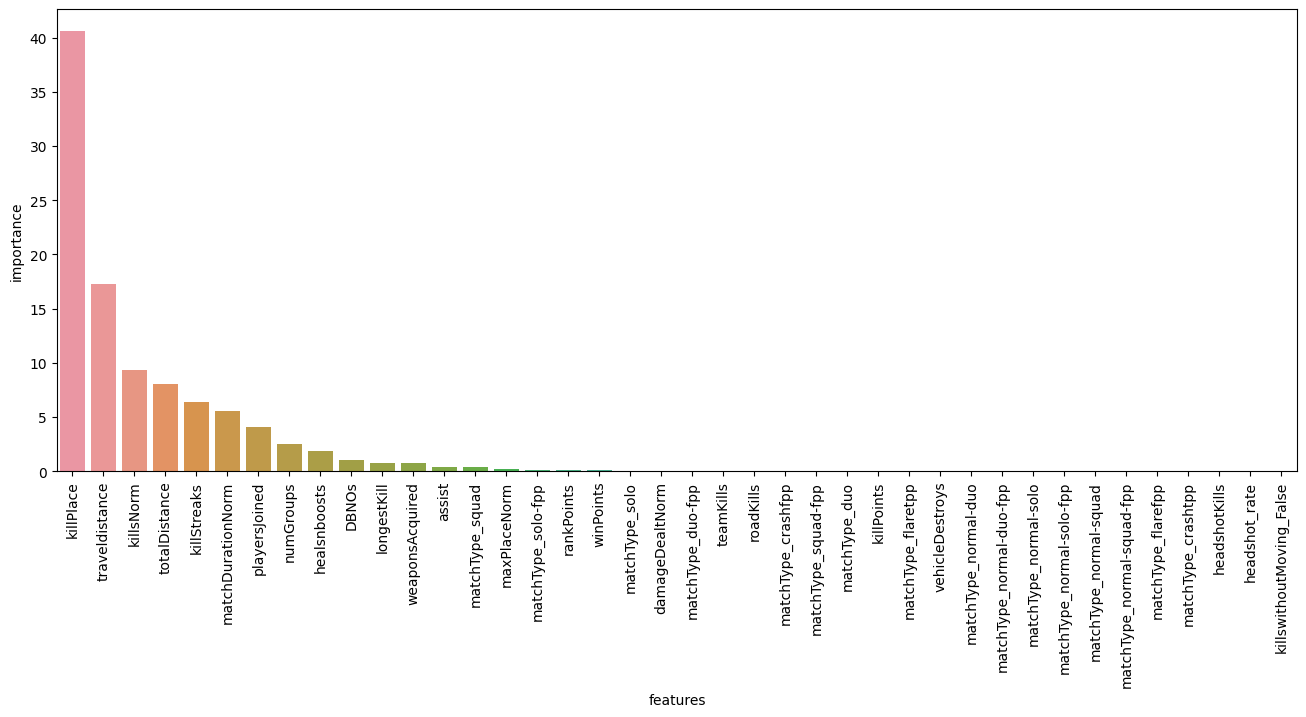

In [47]:
sns.barplot(x='features',y='importance',data=feature_importance_df)
plt.xticks(rotation=90)

# Prediction

In [48]:
pred=model.predict(x_test)

In [49]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,pred)) # it should be low
r2=r2_score(y_test,pred) # it should be high

In [51]:
print("Test Performance : ")
print("RMSE : ",rmse.round(2))
print("R2 : ",round(r2,2))

Test Performance : 
RMSE :  0.08
R2 :  0.93
